In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/shiva/Downloads/Data sets/Border_Crossing_Entry_Data.csv')
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [3]:
df['Date']=pd.to_datetime(df["Date"])
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


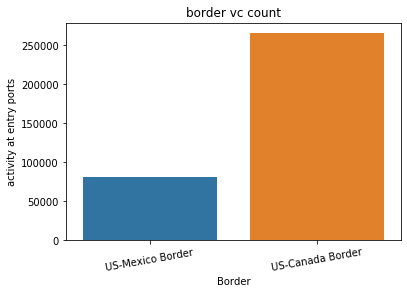

In [4]:
sns.countplot("Border",data=df)
plt.xticks(rotation=10)
plt.ylabel("activity at entry ports")
plt.title('border vc count')
plt.show()

From above can be observed that US-Canada Border has highest count

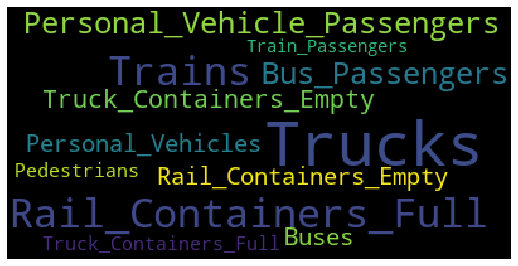

In [5]:
abc = ','#just to visualy see the words present in the data(column)
abc2=df.Measure.unique()
abc3 = abc.join(abc2)
abc3=abc3.replace(" ","_")
wordcloud = WordCloud().generate(abc3)
plt.figure(figsize=(7,5),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [6]:
people=['Personal vehicles','Bus Passengers','Personal Vehicle Passengers','Train Passengers','Trains','Buses']
df[df.Measure.isin(people)]
goods=['Truck Containers Empty','Rail Containers Full','Rail Containers Empty','Truck Containers Full','Trucks']

In [7]:
df['Date'].max()

Timestamp('2019-03-01 00:00:00')

In [8]:
df["Date"].min()

Timestamp('1996-01-01 00:00:00')

In [9]:
data_border_pass=df[df.Measure.isin(people)].groupby(["Border","Measure","Date"],as_index=False).sum()
data_border_pass.head()

,Border,Measure,Date,Port Code,Value
0,US-Canada Border,Bus Passengers,1996-01-01,192383,162064
1,US-Canada Border,Bus Passengers,1996-02-01,192383,200148
2,US-Canada Border,Bus Passengers,1996-03-01,192383,209231
3,US-Canada Border,Bus Passengers,1996-04-01,192383,306249
4,US-Canada Border,Bus Passengers,1996-05-01,192383,405742


In [10]:
print("col_names:count")#code_to_print_all_unique/value_counts at once
for i in df.columns:
    print(i,len(df.loc[:,i].unique()))

col_names:count
Port Name 116
State 15
Port Code 117
Border 2
Date 279
Measure 12
Value 53305
Location 224


In [11]:
#We have a date column that is in string format so we can get better results
#if we change it to datetime format. Also we can extract Year and Month from date.
df['year']=df["Date"].apply(lambda x:x.year)
month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df["Month"]=df["Date"].apply(lambda x:x.month).map(month)
df.tail()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,year,Month
346728,Norton,Vermont,211,US-Canada Border,1996-01-01,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,Jan
346729,Columbus,New Mexico,2406,US-Mexico Border,1996-01-01,Personal Vehicles,29486,POINT (-107.63 31.78),1996,Jan
346730,Hansboro,North Dakota,3415,US-Canada Border,1996-01-01,Rail Containers Full,0,POINT (-99.35 49),1996,Jan
346731,Calexico East,California,2507,US-Mexico Border,1996-01-01,Buses,0,POINT (-115.39 32.67),1996,Jan
346732,Presidio,Texas,2403,US-Mexico Border,1996-01-01,Trucks,347,POINT (-104.39000000000001 29.56),1996,Jan


In [12]:
#from above we can see that portname/port code are not same might be an manual error in port name lets chk that down
temp=df[["Port Name","Port Code"]].drop_duplicates()
temp[temp["Port Name"].duplicated(keep=False)]

,Port Name,Port Code
29,Eastport,3302
217,Eastport,103


In [13]:
temp.duplicated().sum()

0

In [14]:
df.iloc[[29,217]]

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,year,Month
29,Eastport,Idaho,3302,US-Canada Border,2019-03-01,Trains,101,POINT (-116.18027999999998 48.99944),2019,Mar
217,Eastport,Maine,103,US-Canada Border,2019-03-01,Trucks,165,POINT (-66.99387 44.90357),2019,Mar


here we can observe that port names are same for index 29,217 but state & port code are different that simply says that those are 2 different values but just the same port name but practically they differ by rest values

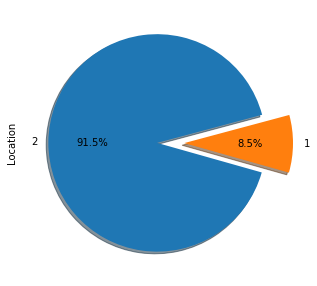

In [15]:
indexes = df["Location"].drop_duplicates().index
temp = df.iloc[indexes].groupby(by="Port Code")["Location"].count()
plt.figure(figsize=(5,5))
temp.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.25],startangle=15)

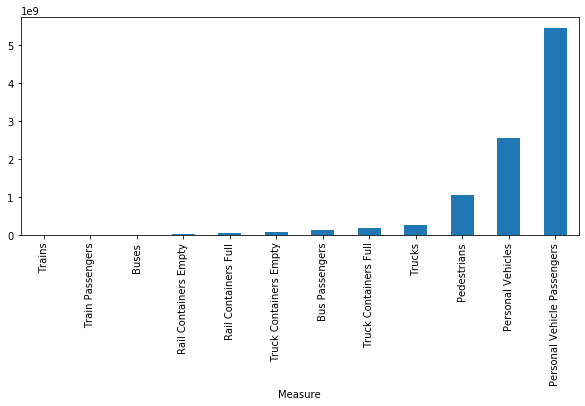

In [16]:
#lets see number of crossing acording to measures
plt.figure(figsize=(10,4))
df.groupby(by='Measure')['Value'].sum().sort_values(ascending=True).plot(kind="bar")
plt.show()


most crossing as done by Personal vehicle passenger and followed by personal vechicles and chk is it the same case at the other border too

In [17]:
tempp = df.groupby(by=["Measure","Border"])["Value"].sum().unstack()
tempp.fillna(0,inplace=True)
tempp

Border,US-Canada Border,US-Mexico Border
Measure,,
Bus Passengers,74327495,68003376
Buses,3093613,5450143
Pedestrians,12968574,1031249540
Personal Vehicle Passengers,1538658810,3918732465
Personal Vehicles,736044372,1823646820
Rail Containers Empty,12350707,8788737
Rail Containers Full,30461135,7827258
Train Passengers,5909597,287853
Trains,700993,202871


Text(0.5, 1.0, 'US-Border-Mexico')

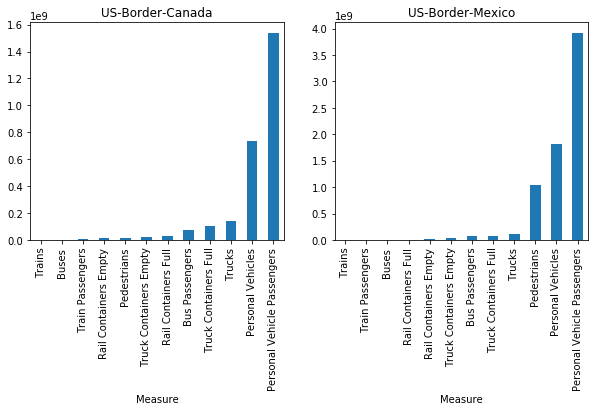

In [18]:
tempp = df.groupby(by=["Border","Measure"])["Value"].sum().unstack()
tempp.fillna(0,inplace=True)
plt.figure(figsize=(10,4))
plt.subplot(121)
tempp.iloc[0].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('US-Border-Canada')
plt.subplot(122)
tempp.iloc[1].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('US-Border-Mexico')

measures are likely distributed in both borders. But, One has higher number of crossings than the other. Let's see that.
Below graph represents total number of crossings from borders.

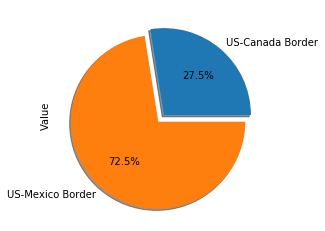

In [19]:
df.groupby(by='Border')["Value"].sum().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1],shadow=True)

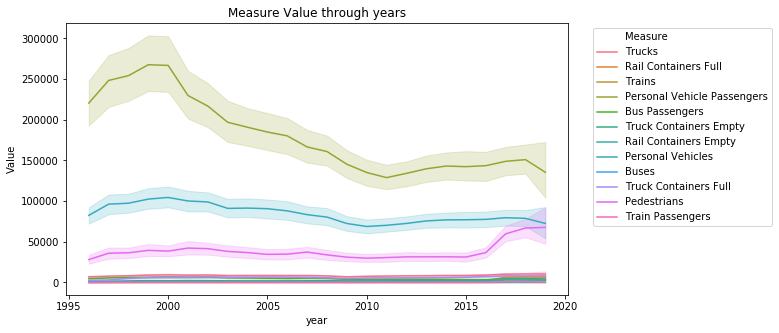

In [20]:
plt.figure(figsize=(9,5))
sns.lineplot(data=df,x='year',y='Value',hue='Measure',legend='full')
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
plt.title("Measure Value through years")
plt.show()

Above chart shows number of crossings throughout years.Crossings have been decreasing since year 2000. There is a slight increment in pedestrians crossing over past few yers

Text(0.5, 1.0, 'value by month')

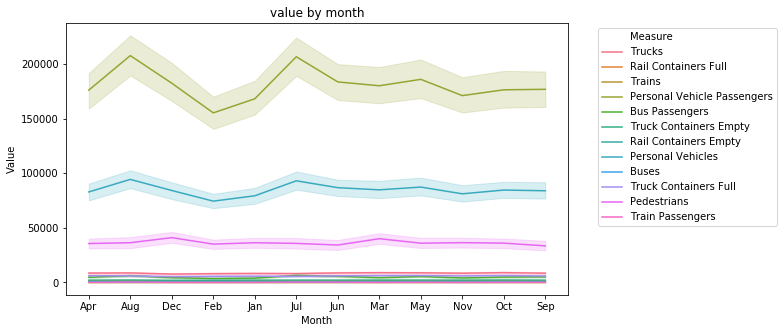

In [21]:
plt.figure(figsize=(9,5))
sns.lineplot(x="Month",y='Value',data=df,hue="Measure",legend='full')
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.title('value by month')

Above graph shows number of crossings by month. July and Aug have highest crossings where Feb has the least number of crossings.

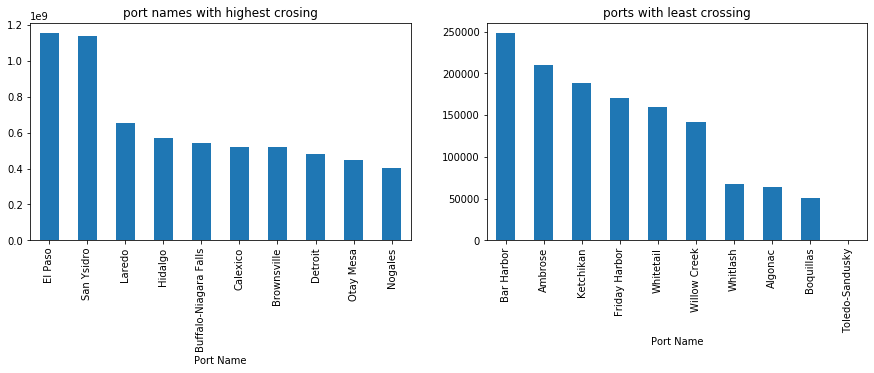

In [22]:
temp = df.groupby(by='Port Name')["Value"].sum().sort_values(ascending=False)
plt.figure(figsize=(15,4))
plt.subplot(121)
temp.head(10).plot(kind="bar")
plt.title("port names with highest crosing")

plt.subplot(122)
temp.tail(10).plot(kind='bar')
plt.title("ports with least crossing")
plt.show()
del temp

In [23]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,year,Month
0,Calexico East,California,2507,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,Mar
1,Van Buren,Maine,108,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,Mar
2,Otay Mesa,California,2506,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,Mar
3,Nogales,Arizona,2604,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,Mar
4,Trout River,New York,715,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,Mar


In [24]:
df.Measure.value_counts()

Personal Vehicles              30219
Personal Vehicle Passengers    30196
Trucks                         29856
Truck Containers Empty         29757
Truck Containers Full          29694
Buses                          28822
Bus Passengers                 28820
Pedestrians                    28697
Trains                         27708
Rail Containers Empty          27684
Rail Containers Full           27657
Train Passengers               27623
Name: Measure, dtype: int64

In [25]:
def sizes(Measure):
    if Measure in ('Trucks','Rail Containers Full','Rail Containers Empty','Truck Containers Empty','Truck Containers Full'):
        return ('MID-SIZE')
    elif Measure in ('Personal Vehicle Passengers','Bus Passengers','Personal Vehicles','Pedestrians','Train Passengers'):
        return ('SMALL-SIZE')
    else:
        return ("BIG-SIZE")
df['Size']=df["Measure"].apply(sizes)

In [26]:
df.head(1)

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,year,Month,Size
0,Calexico East,California,2507,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,Mar,MID-SIZE


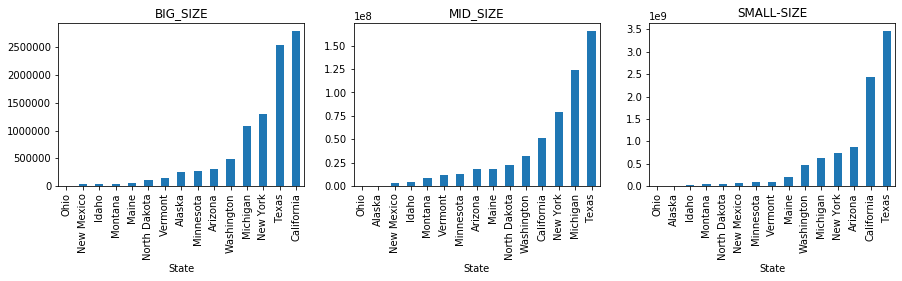

In [27]:
temp = df.groupby(by=["Size","State"])["Value"].sum().unstack()
temp.fillna(0,inplace=True)
plt.figure(figsize=(15,3))

plt.subplot(131)
temp.iloc[0].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.title("BIG_SIZE")

plt.subplot(132)
temp.iloc[1].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.title("MID_SIZE")

plt.subplot(133)
temp.iloc[2].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.title("SMALL-SIZE")
del temp

Insights :
California has most number of big_size crossings but has averege on MID-SIZE
Ohio,New Mexico and Idaho has least amount of crossings in all the categories.
Texas has most mid_size and small size crossings and also, 2nd largest big_size crossings.
New York also has good number of crossings in all the three states.

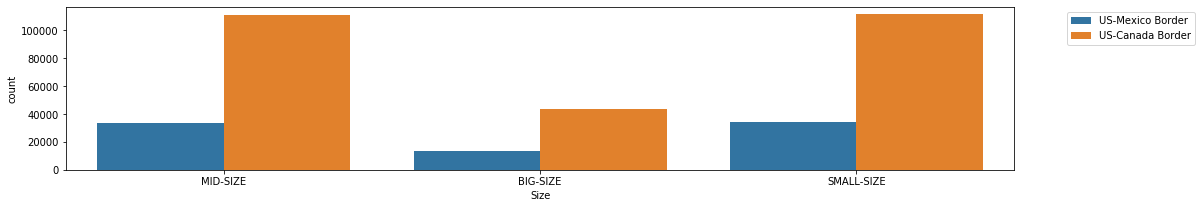

In [28]:
plt.figure(figsize=(17,3))
sns.countplot(x='Size',data=df,hue='Border')
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")

Here we categorised size's based on border's.
And BIG-SIZE measure's has the least crossing's based on borders.
And it can also been observed that most number of crossing happens to be from US-Canada-Border.

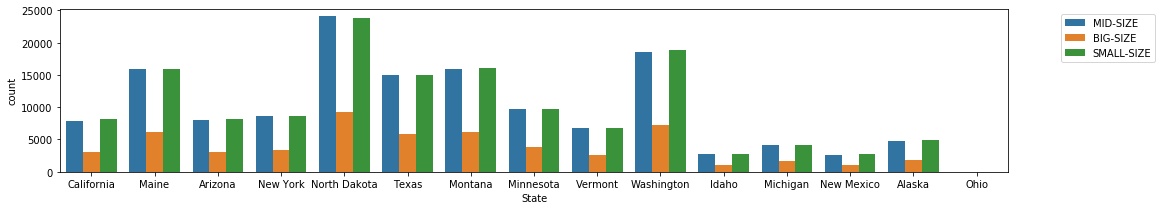

In [29]:
plt.figure(figsize=(17,3))
sns.countplot(x='State',data=df,hue='Size')
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")

INSIGHT's OBSERVED:- 
From the above plots we can see that it describes the number of crossing's based on the size's in each state excluding the value column
And it can been seen that the highest crossing in State north dakota and least in ohio

<Figure size 1080x216 with 0 Axes>

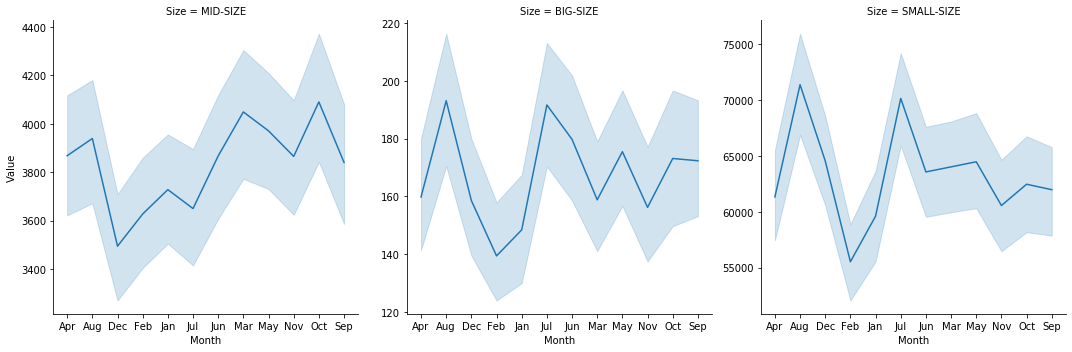

In [30]:
plt.figure(figsize=(15,3))
g = sns.FacetGrid(data=df,col='Size',sharey=False,height=5,aspect=1)
g.map(sns.lineplot,'Month','Value')

INSIGHT's OBSERVED :-

From the above plots it can be seen that
MID-SIZE crossing are least in month of (DEC,JUL,NOV) AND its most high at(AGU,JAN,MAR-MAY,OCT)
BIG-SIZE crossing are least in month of (FEB-JAN,MAR,NOV) its most high at(AGU,JUL-JUN,MAY,OCT)
SMALL-SIZE crossing are least in month of (FEB-JAN,JUN,NOV) its most high at(AGU,JUL,MAY,OCT)
On over all analysis irrespective of there size's we can see that the crossing where at high rate in month's(AGU,MAY,OCT)
and has least crossing rate in month(NOV)

In [31]:
df.Measure.value_counts()

Personal Vehicles              30219
Personal Vehicle Passengers    30196
Trucks                         29856
Truck Containers Empty         29757
Truck Containers Full          29694
Buses                          28822
Bus Passengers                 28820
Pedestrians                    28697
Trains                         27708
Rail Containers Empty          27684
Rail Containers Full           27657
Train Passengers               27623
Name: Measure, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 11 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null datetime64[ns]
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
year         346733 non-null int64
Month        346733 non-null object
Size         346733 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 29.1+ MB


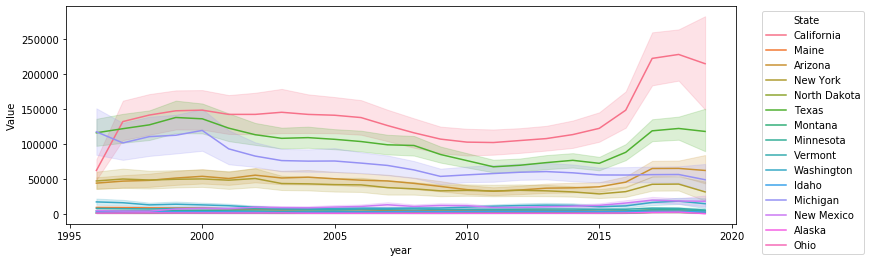

In [33]:
plt.figure(figsize=(12,4))
sns.lineplot(y='Value',x='year',data=df,hue="State")
plt.legend(bbox_to_anchor=(1.2,1),loc='upper right')

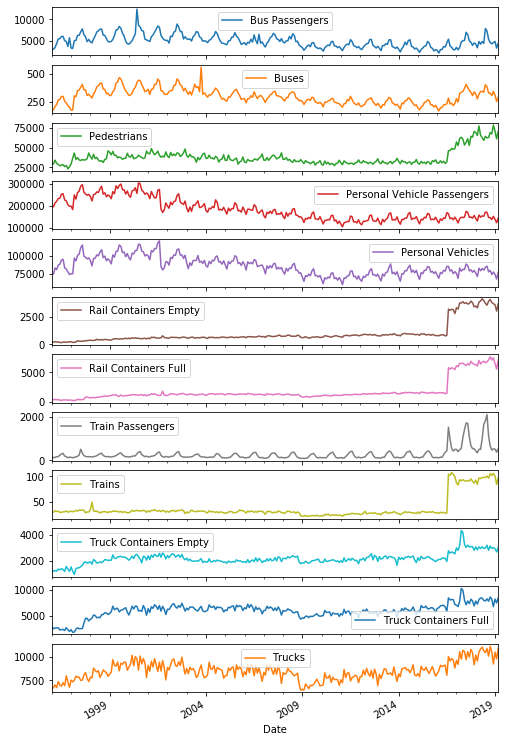

In [34]:
df4 = df.copy()#trailcode
df44 = df4.loc[:,["Date","Measure",'Value']]
df44 = df44.set_index("Date")
df44=df44.groupby('Measure').resample('M').mean()
df44.reset_index().pivot(index='Date',columns="Measure",values="Value").plot(subplots=True,figsize=(8,14))
plt.show()

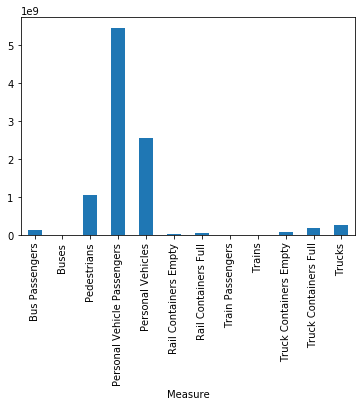

In [35]:
dfp = df.loc[:,["Measure","Value"]] #trailcode
dfp.groupby("Measure").Value.sum().plot(kind='bar')

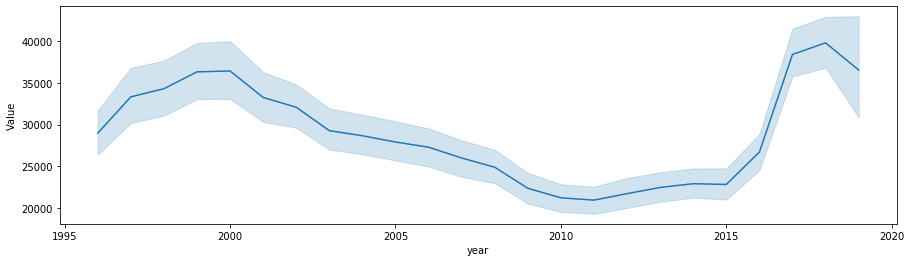

In [36]:
plt.figure(figsize=(15,4))#trailcode
sns.lineplot(y='Value',x='year',data=df)


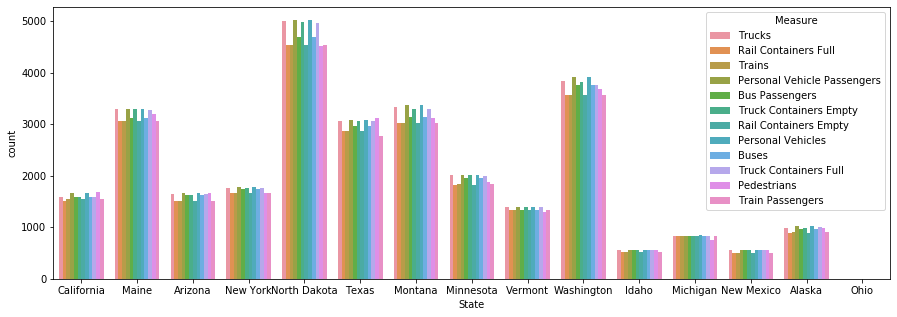

In [37]:
plt.figure(figsize=(15,5))#trailcode
sns.countplot("State",data=df,hue="Measure")

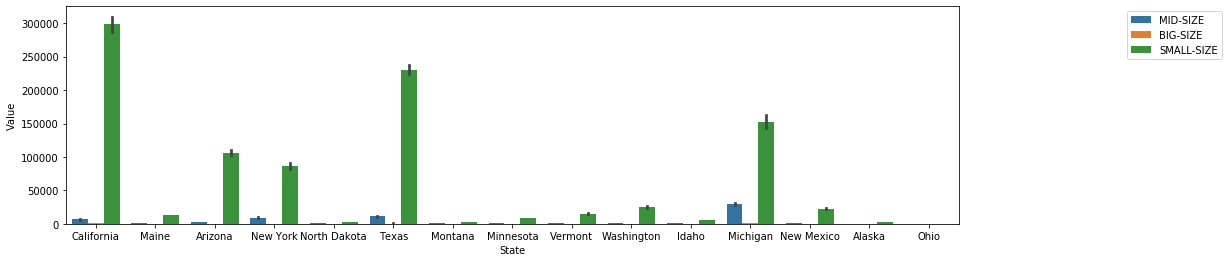

In [38]:
plt.figure(figsize=(16,4))#trailcode
sns.barplot(y="Value",x="State",data=df,hue="Size")
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right')